In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams["figure.dpi"] = 600

In [2]:
# The Clusterer class which clsuters the data usign c-means fuzzy algorithm
class Clusterer:
    
    # Constructor method (to build clusterer objects)
    def __init__(self, c, m):
        self.c = c
        self.rng = np.random.default_rng()
        self.m = m
    
    # Initialize centroids method (to pick random samples of data and modify their feature coordinates to be used as initial centroids)
    def initialize_centroids(self, X):
        num_samples = X.shape[1]
        centroid_indexes = self.rng.choice(num_samples, self.c, replace = False)
        centroids = X[:, centroid_indexes]
        centroids = centroids + np.sqrt(np.mean(X, axis = 1)).reshape(-1, 1)
        self.centroids = centroids
    
    # Calculate euclidean distances method (to calculate euclidean distance between centroid and data sample)
    def calculate_euclidean_distances(self, X):
        num_samples = X.shape[1]
        distance_matrix = np.zeros(shape = (self.c, num_samples))
        for i in range(self.c):
            distance_matrix[i, :] = np.linalg.norm(self.centroids[:, i].reshape(-1, 1)-X, axis = 0, ord = 2)
        self.distance_matrix = distance_matrix
    
    # Calculate cluster dependence method (to calculate the dependence between cluster and data samples)
    def calculate_cluster_dependence(self, X):
        num_samples = X.shape[1]
        cluster_dependence = np.zeros(shape = (self.c, num_samples))
        self.calculate_euclidean_distances(X)
        for i in range(self.c):
            denominator = np.zeros(shape = (self.c, num_samples))
            for j in range(self.c):
                denominator[j, :] = (self.distance_matrix[i, :]/self.distance_matrix[j, :])**(2/(self.m-1))
            cluster_dependence[i, :] = 1/np.sum(denominator, axis = 0)
        self.cluster_dependence = cluster_dependence
    
    # Update centroids method (to update centroid points based on the cluster dependence)
    def update_centroids(self, X):
        num_samples = X.shape[1]
        centroids = np.matmul(X, (self.cluster_dependence.transpose())**(self.m))/((np.sum((self.cluster_dependence)**(self.m), axis = 1)).reshape(1, -1))
        self.centroids = centroids
    
    # Cluster method (to perform clustering calculations)
    def cluster(self, X, epsilon = 1e-5, max_steps = 10000):
        self.initialize_centroids(X)
        centroids_old = self.centroids.copy()
        error = 1
        step = 0
        while (error > epsilon) and (step <= max_steps):
            step += 1
            self.calculate_cluster_dependence(X)
            self.update_centroids(X)
            centroids_new = self.centroids.copy()
            error = np.abs(centroids_new-centroids_old).max()
            centroids_old = centroids_new
        #print("Done after {} steps with error value of {}".format(step, error))
    
    # Calculate cost function method (to calculate the cost function)
    def calculate_cost_function(self, X):
        cost_function = np.sum((self.cluster_dependence**self.m)*(self.distance_matrix**2))
        return cost_function
    
    # Calculate entropy (to calculate clustering entropy value)
    def calculate_entropy(self, X):
        self.calculate_cluster_dependence(X)
        entropy = -np.sum(self.cluster_dependence*np.log(self.cluster_dependence))
        return entropy

In [3]:
# The elbow plot class
class Elbow_Plot:
    
    # Constructor method (to build elbow plot objects)
    def __init__(self):
        pass
    
    # Plot elblow plot method (to plot elbow plot for a given values of m and c)
    def plot_elbow_plot(self, X, c_values, m_values):
        cost_function_values = np.zeros(shape = (m_values.shape[0], c_values.shape[0]))
        for i_m, m in enumerate(m_values):
            for i_c, c in enumerate(c_values):
                clusterer = Clusterer(c, m)
                clusterer.cluster(X)
                cost_function_values[i_m, i_c] = clusterer.calculate_cost_function(X)
                del clusterer
        fig, ax = plt.subplots()
        for i_m, m in enumerate(m_values):
            ax.plot(c_values, cost_function_values[i_m, :], label = "m = {}".format(m))
        ax.legend()

In [4]:
# Reading data 1 datas
with open("data1.csv", "r") as data_file:
    data1 = np.array(list(map(lambda line: list(map(lambda value: float(value), line.replace("\n", "").split(","))), data_file.readlines()))).transpose()

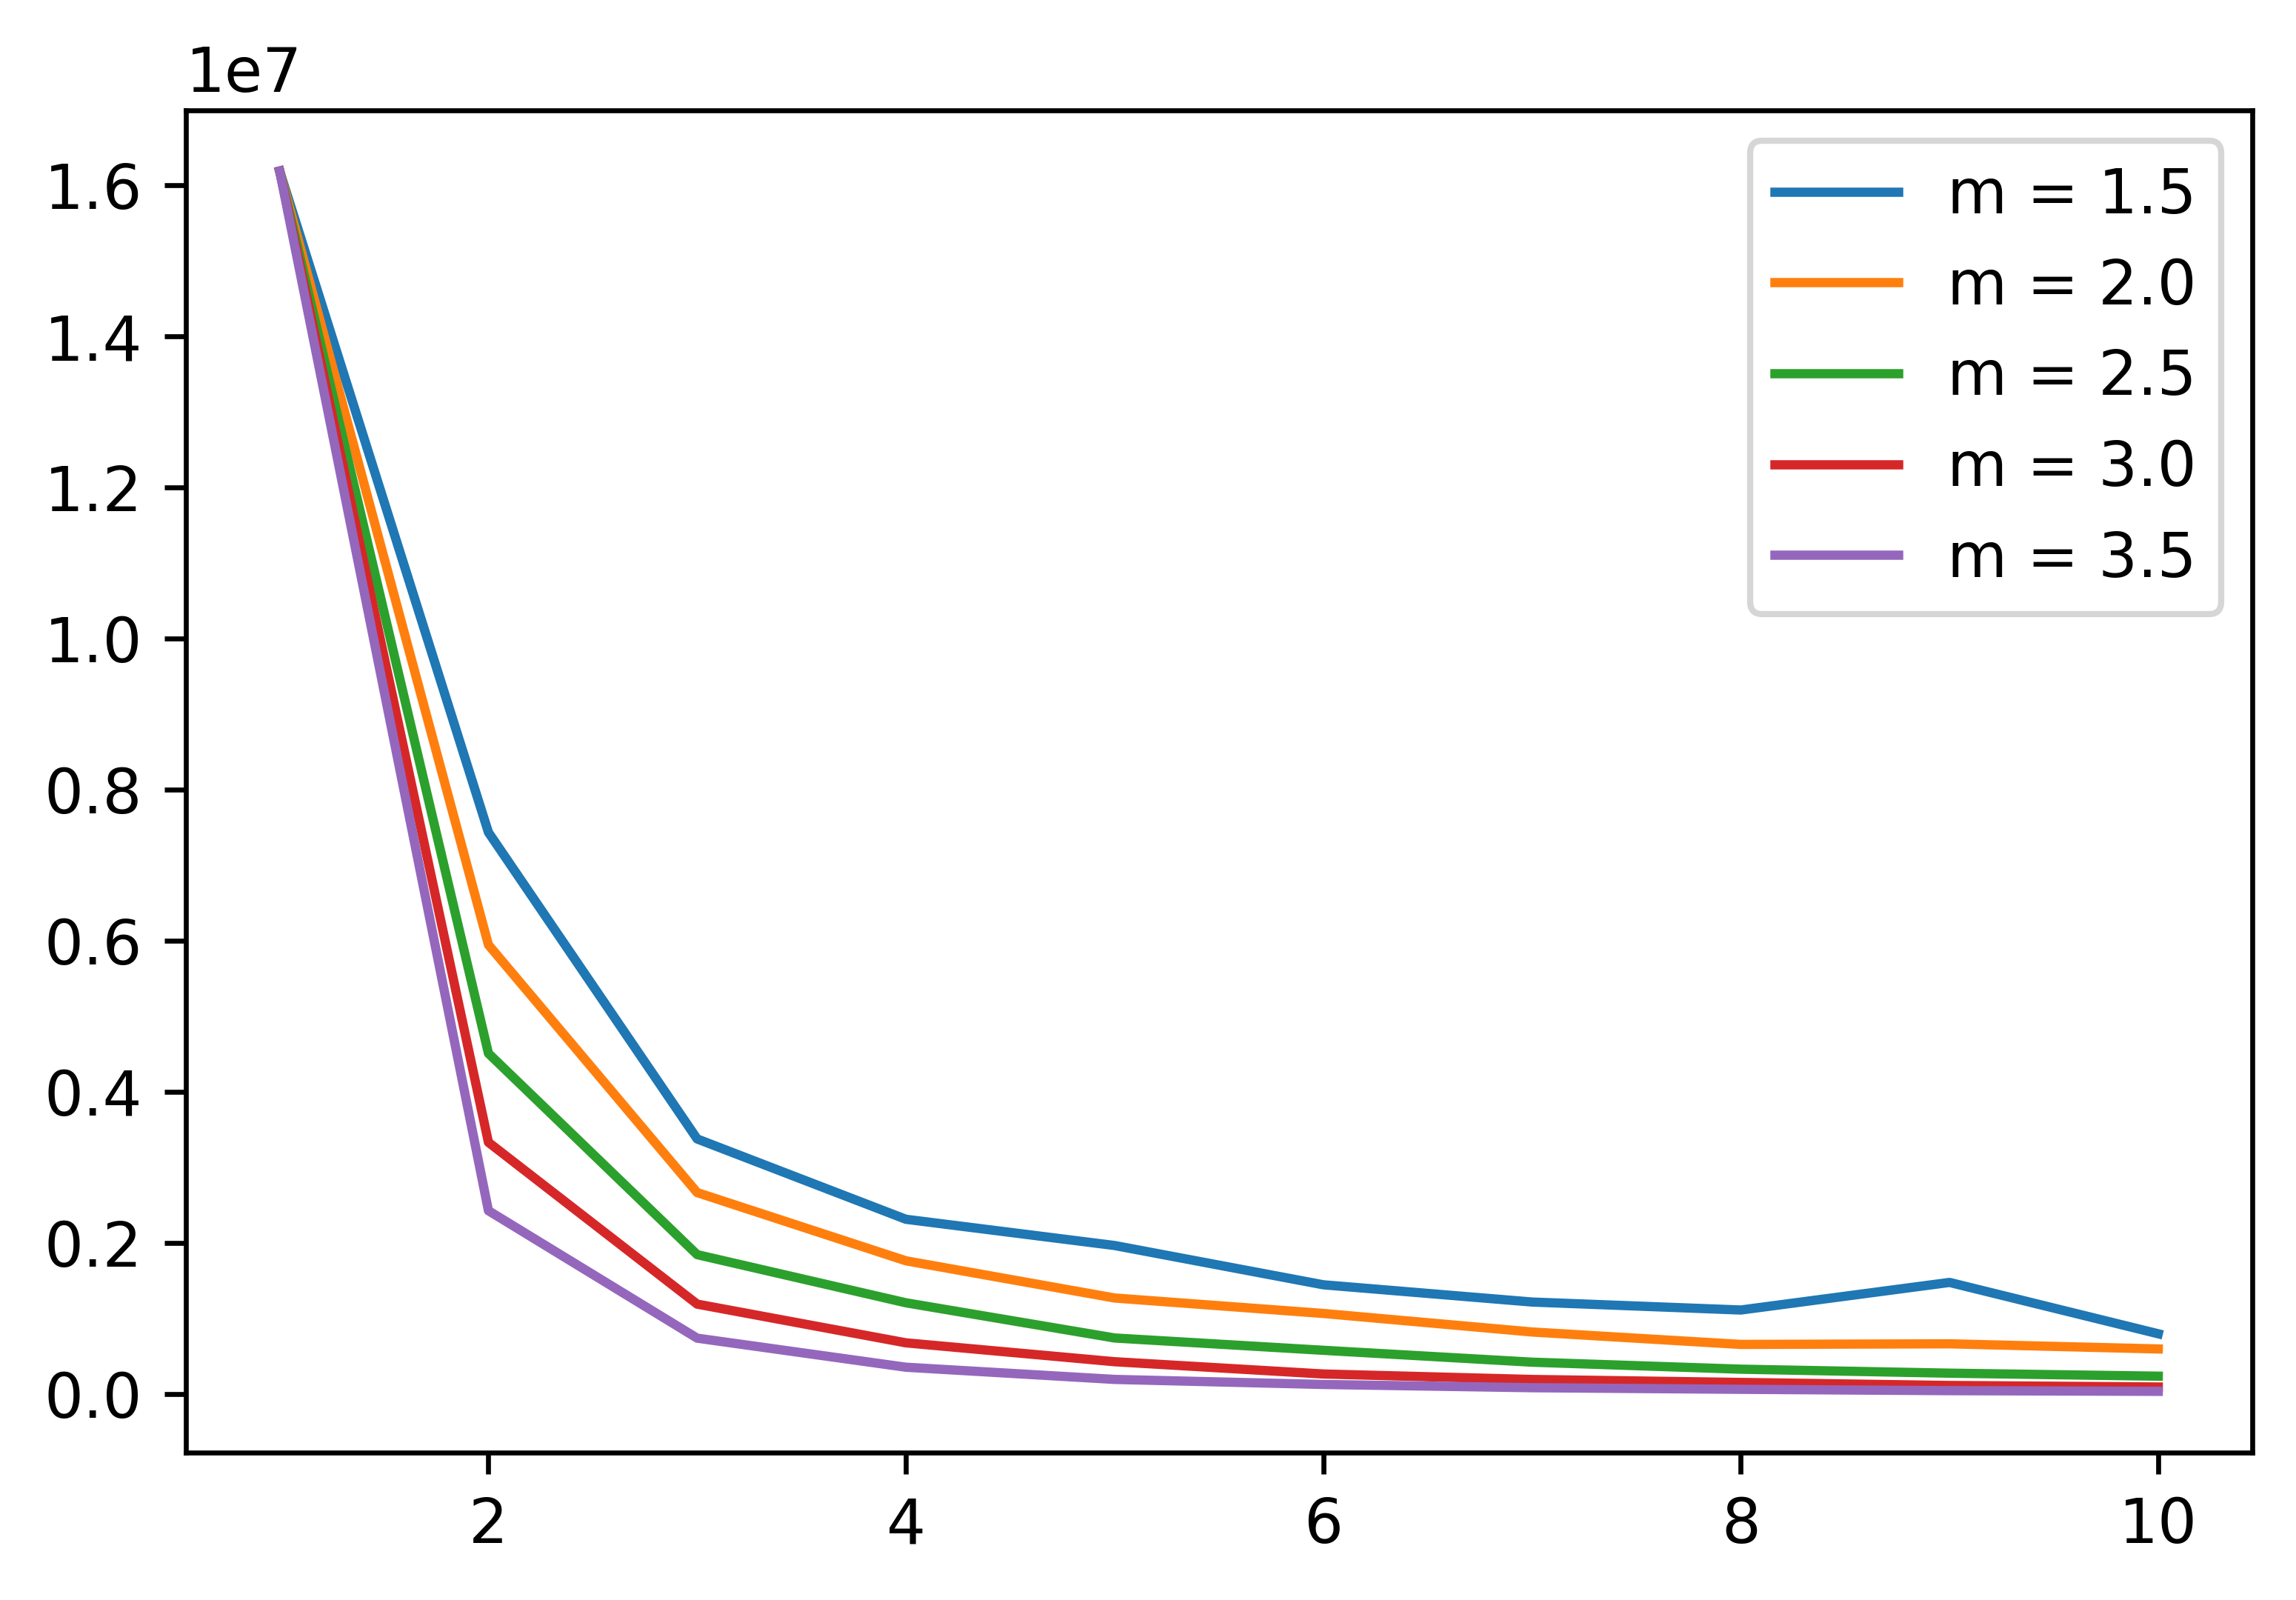

In [8]:
# Plotting elbow plot for data 1
c_values = np.arange(1, 11, 1)
m_values = np.array([1.5, 2, 2.5, 3, 3.5])

elbow_plot = Elbow_Plot()
elbow_plot.plot_elbow_plot(data1, c_values, m_values)

In [5]:
# Reading data 2 datas
with open("data2.csv", "r") as data_file:
    data2 = np.array(list(map(lambda line: list(map(lambda value: float(value), line.replace("\n", "").split(","))), data_file.readlines()))).transpose()

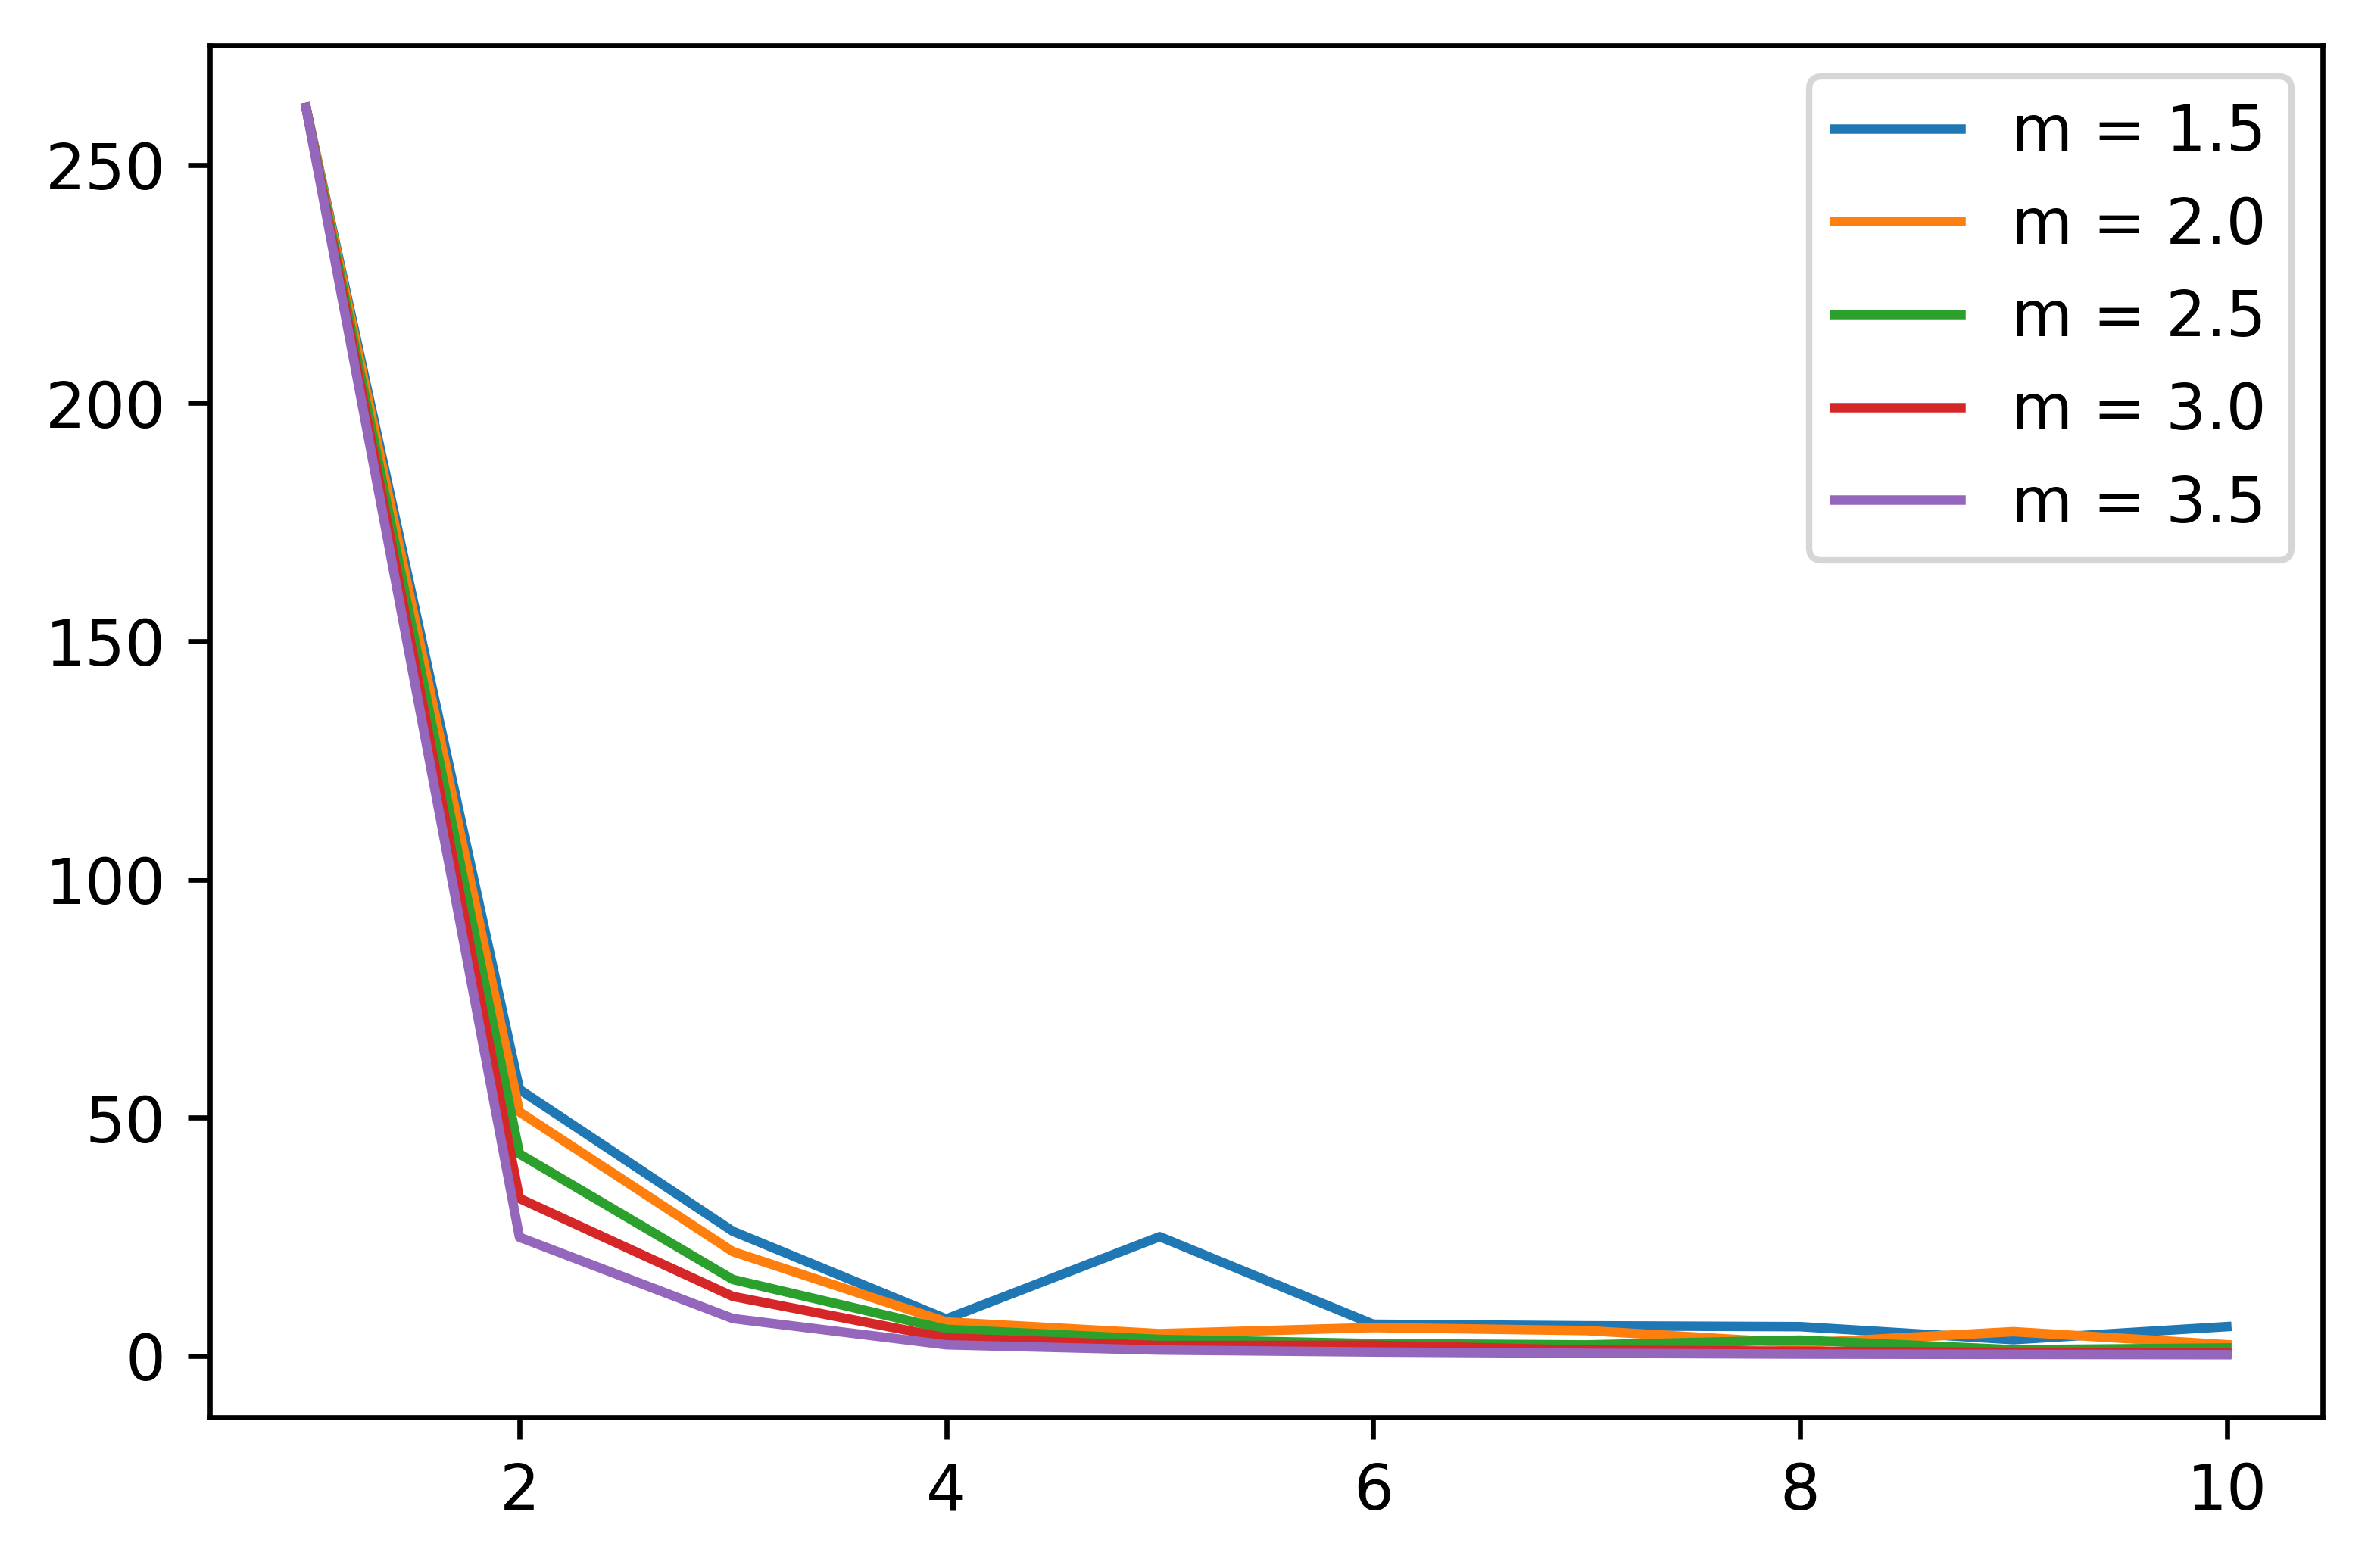

In [9]:
# Plotting elbow plot for data 2
c_values = np.arange(1, 11, 1)
m_values = np.array([1.5, 2, 2.5, 3, 3.5])

elbow_plot = Elbow_Plot()
elbow_plot.plot_elbow_plot(data2, c_values, m_values)

In [6]:
# Reading data 3 datas
with open("data3.csv", "r") as data_file:
    data3 = np.array(list(map(lambda line: list(map(lambda value: float(value), line.replace("\n", "").split(","))), data_file.readlines()))).transpose()

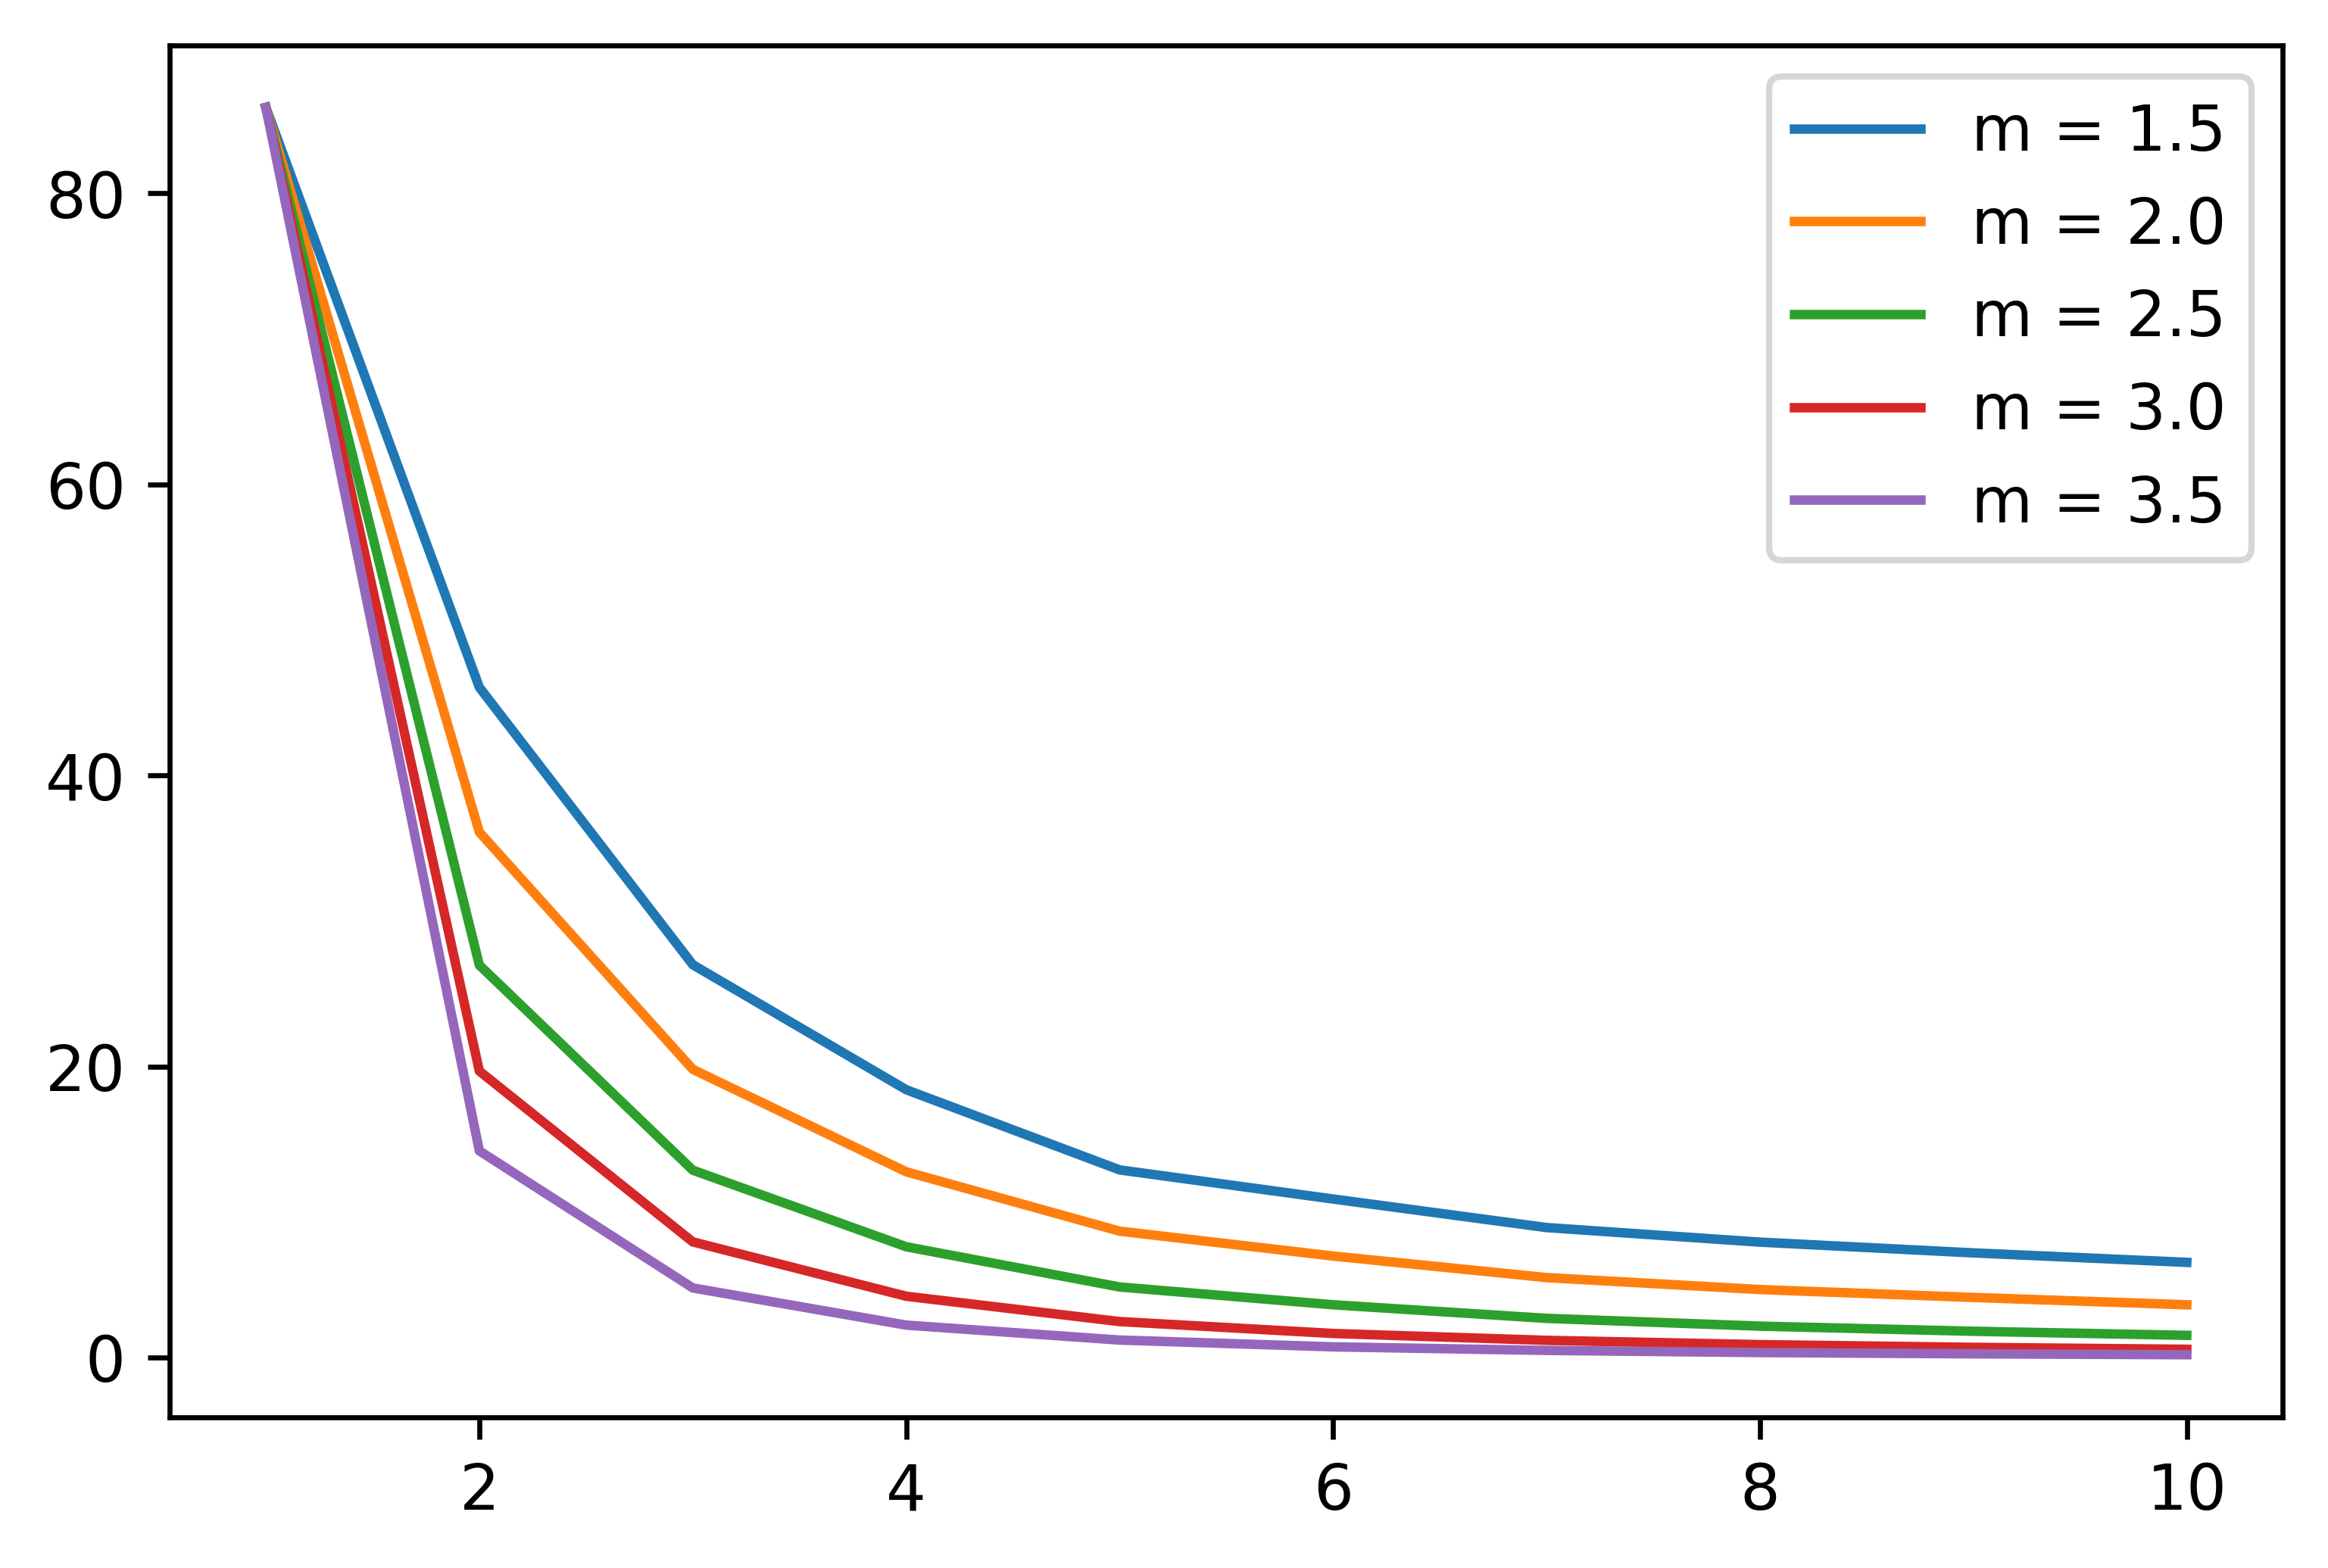

In [10]:
# Plotting elbow plot for data 3
c_values = np.arange(1, 11, 1)
m_values = np.array([1.5, 2, 2.5, 3, 3.5])

elbow_plot = Elbow_Plot()
elbow_plot.plot_elbow_plot(data3, c_values, m_values)

In [7]:
# Reading data 4 datas
with open("data4.csv", "r") as data_file:
    data4 = np.array(list(map(lambda line: list(map(lambda value: float(value), line.replace("\n", "").split(","))), data_file.readlines()))).transpose()

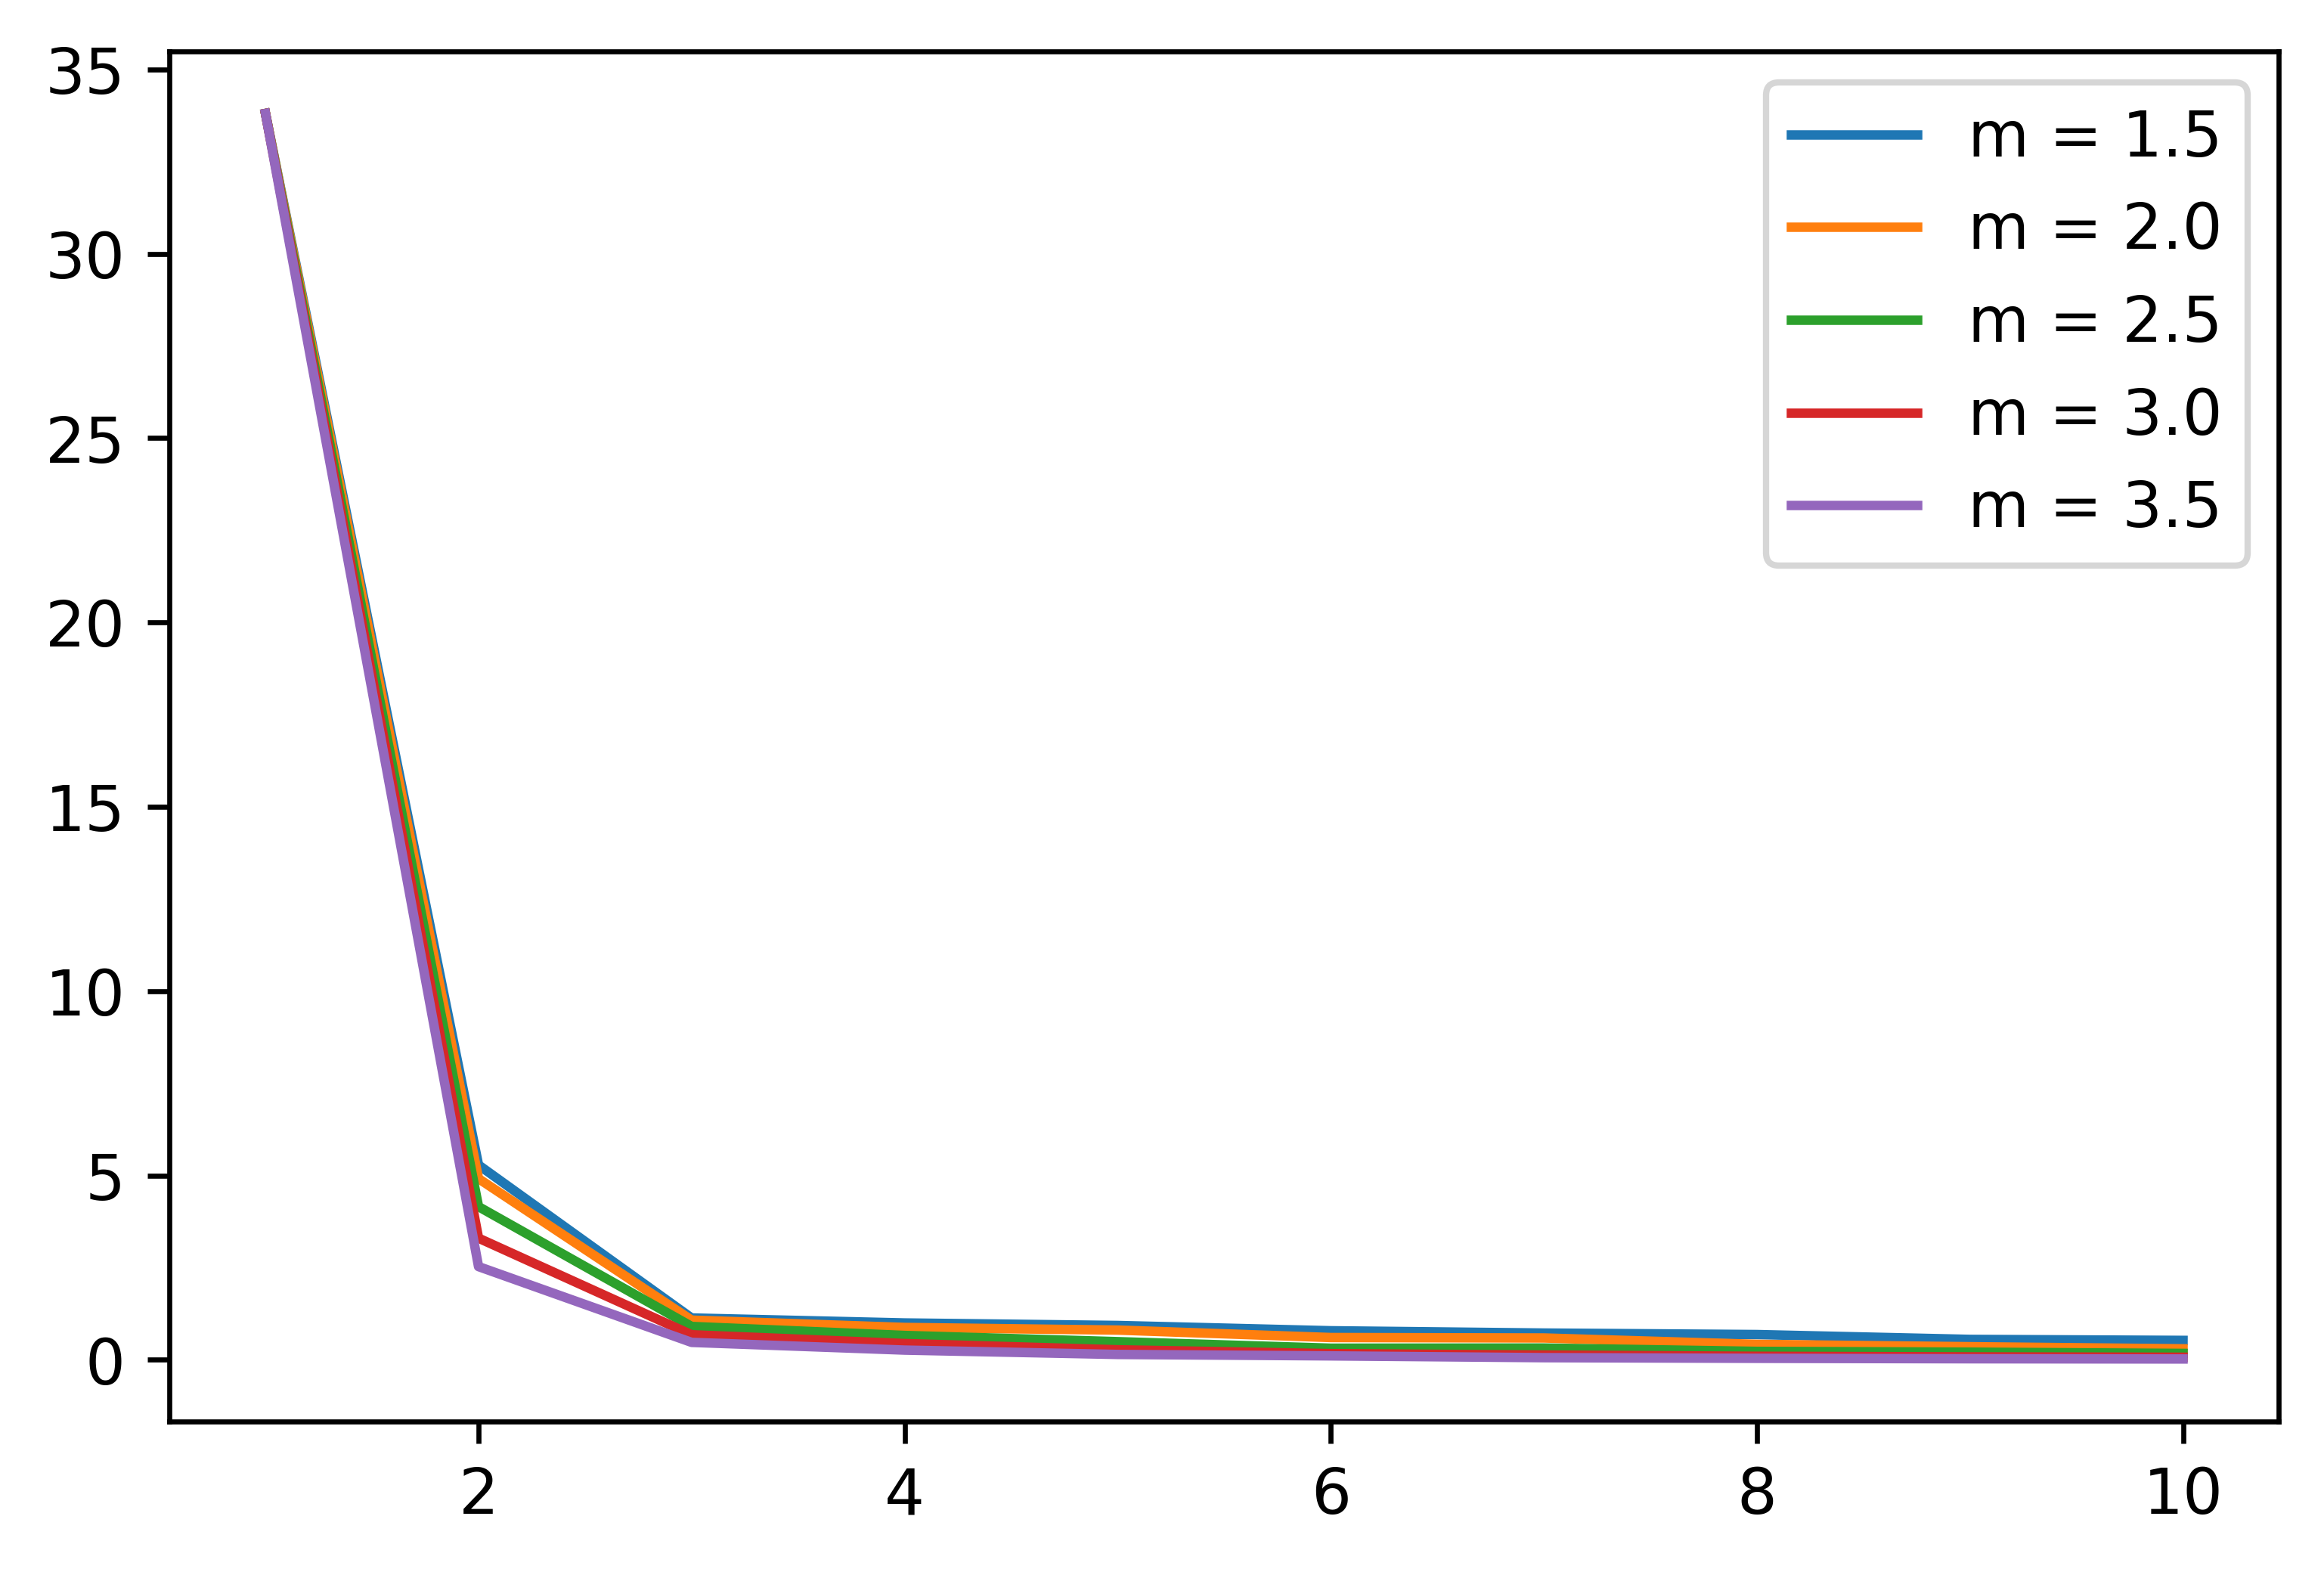

In [11]:
# Plotting elbow plot for data 4
c_values = np.arange(1, 11, 1)
m_values = np.array([1.5, 2, 2.5, 3, 3.5])

elbow_plot = Elbow_Plot()
elbow_plot.plot_elbow_plot(data4, c_values, m_values)

In [20]:
def color_function(u, c):
    x = np.linspace(1, 2, c).reshape(-1, 1)
    p = u/u.sum(axis = 0)
    color = (p*x).sum(axis = 0)
    return color

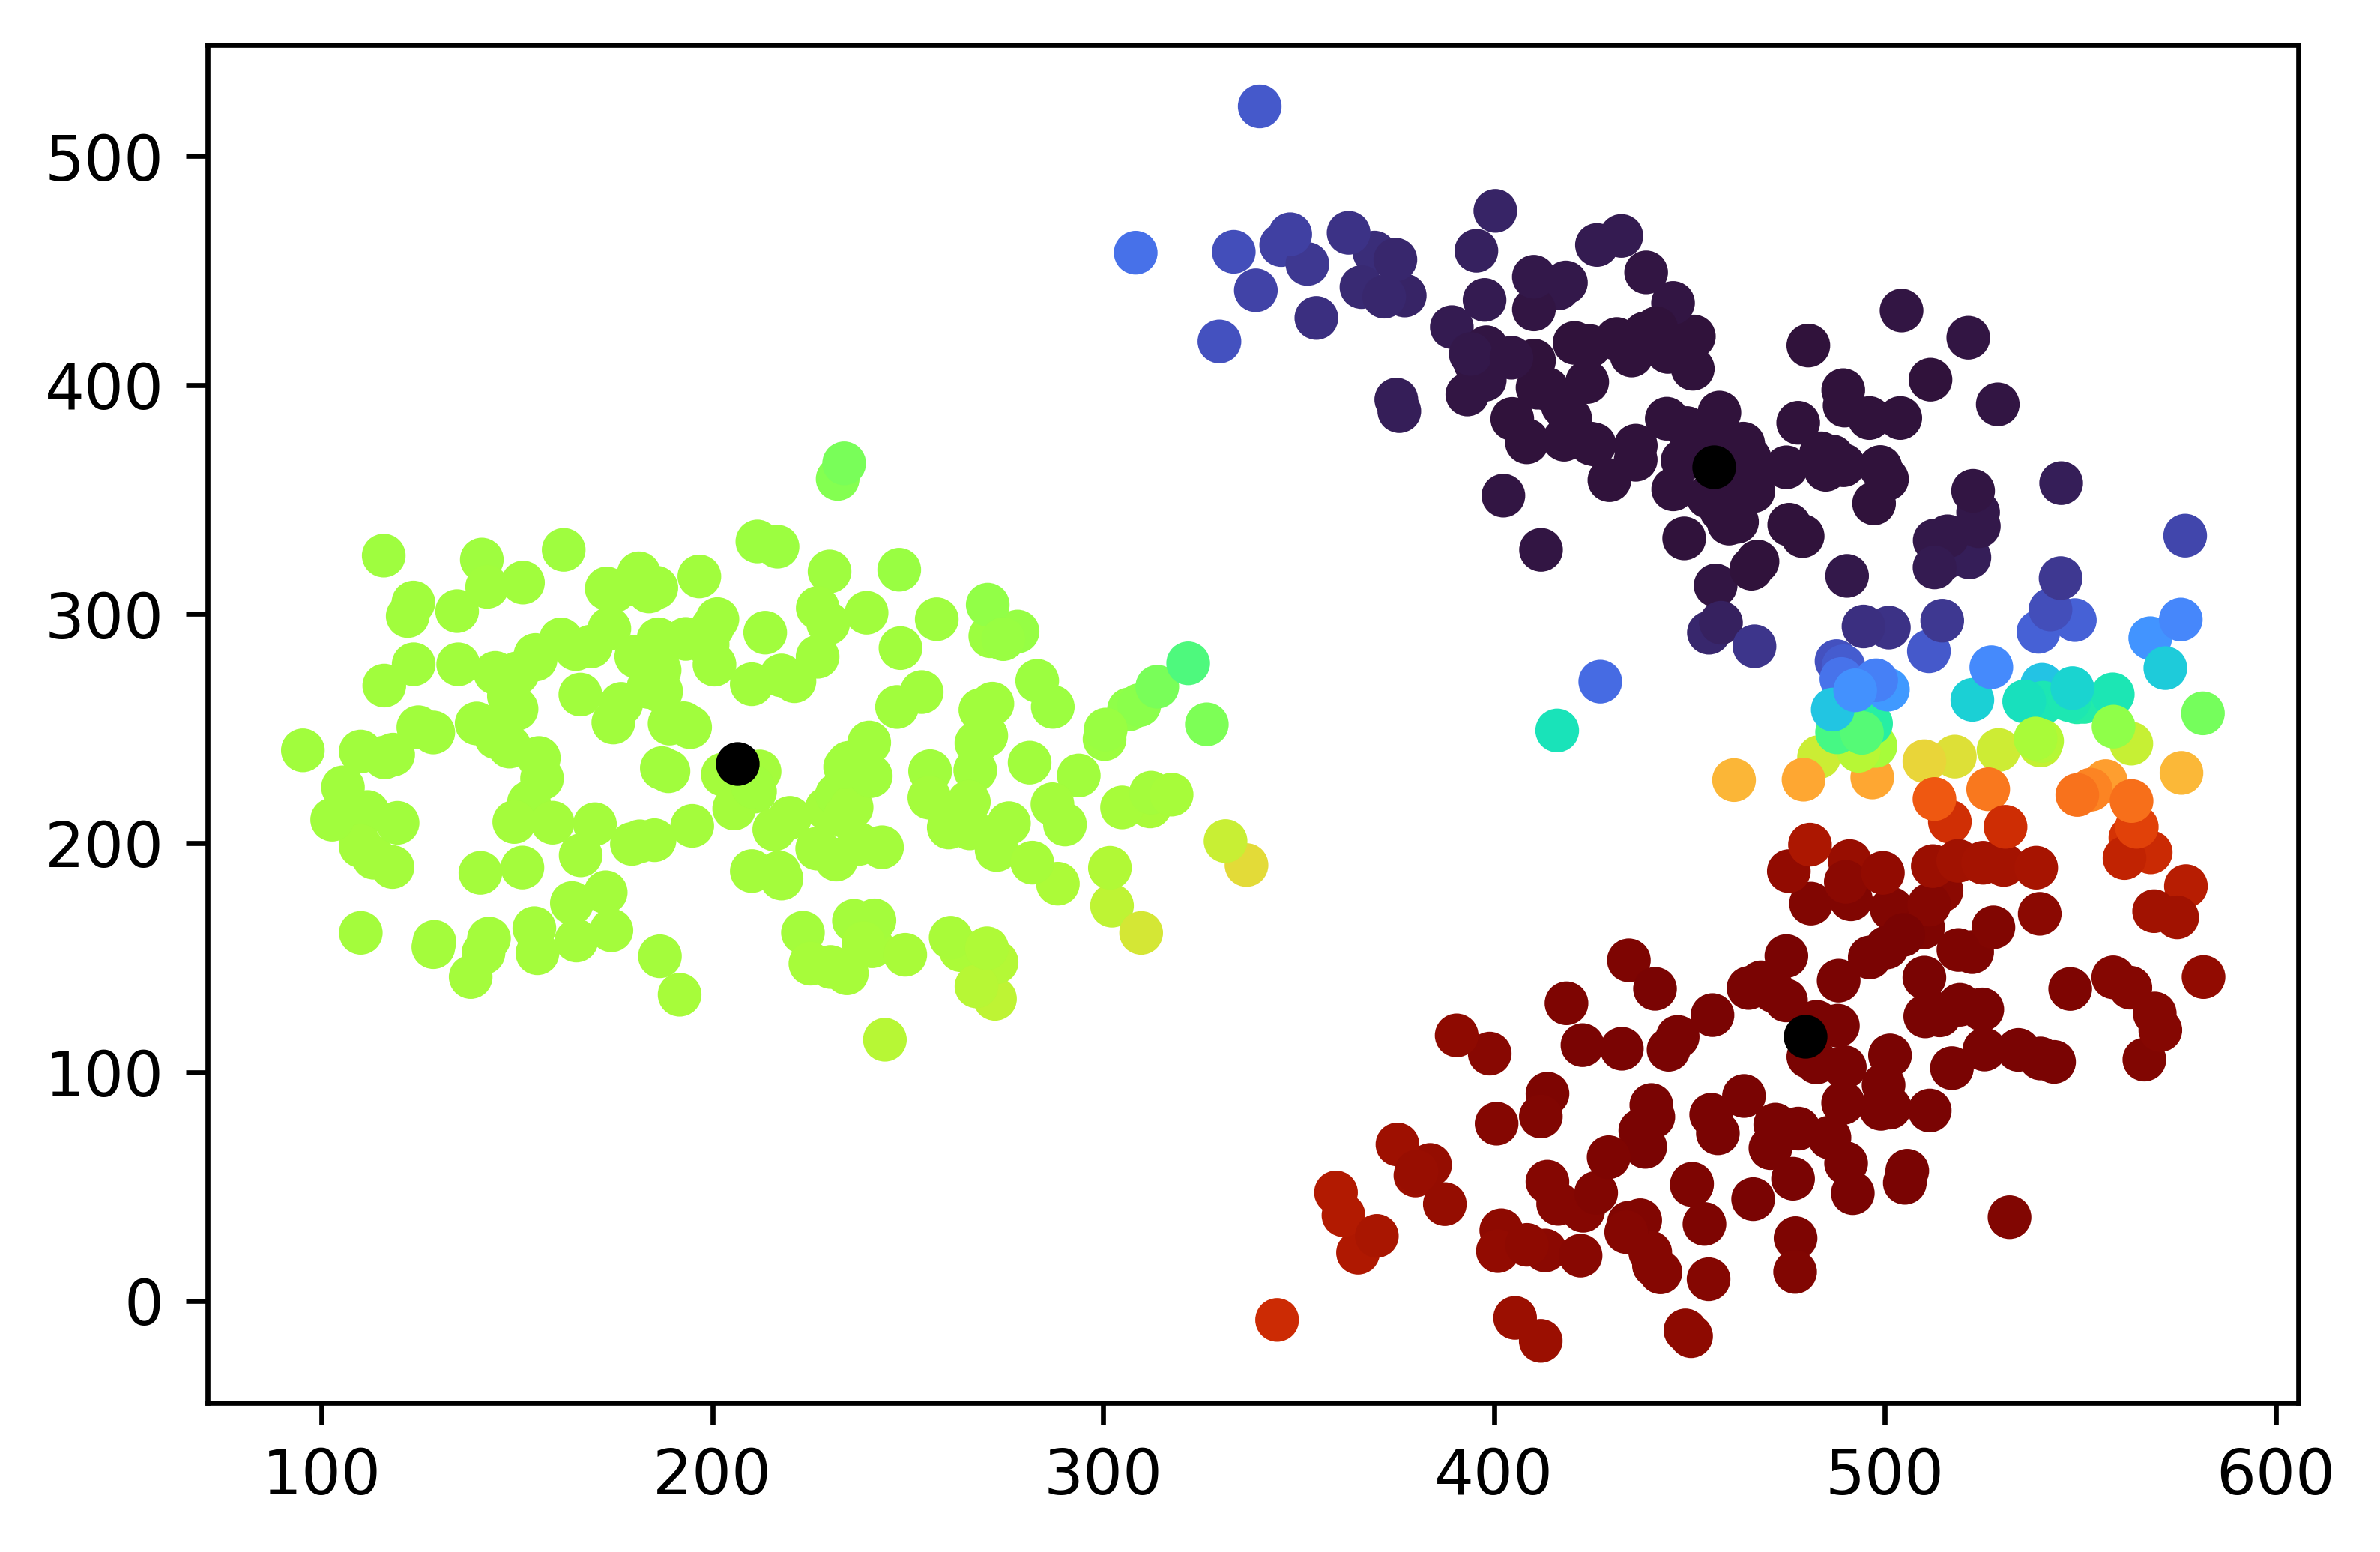

In [21]:
# Plotting cluster plot for data 2
clusterer = Clusterer(3, 1.50)
clusterer.cluster(data1)
color_value = color_function(clusterer.cluster_dependence, 3)
cluster_centroids = clusterer.centroids

fig, ax = plt.subplots()
ax.scatter(data1[0, :], data1[1, :], c = color_value, cmap = "turbo")
ax.scatter(cluster_centroids[0, :], cluster_centroids[1, :], c = "black")

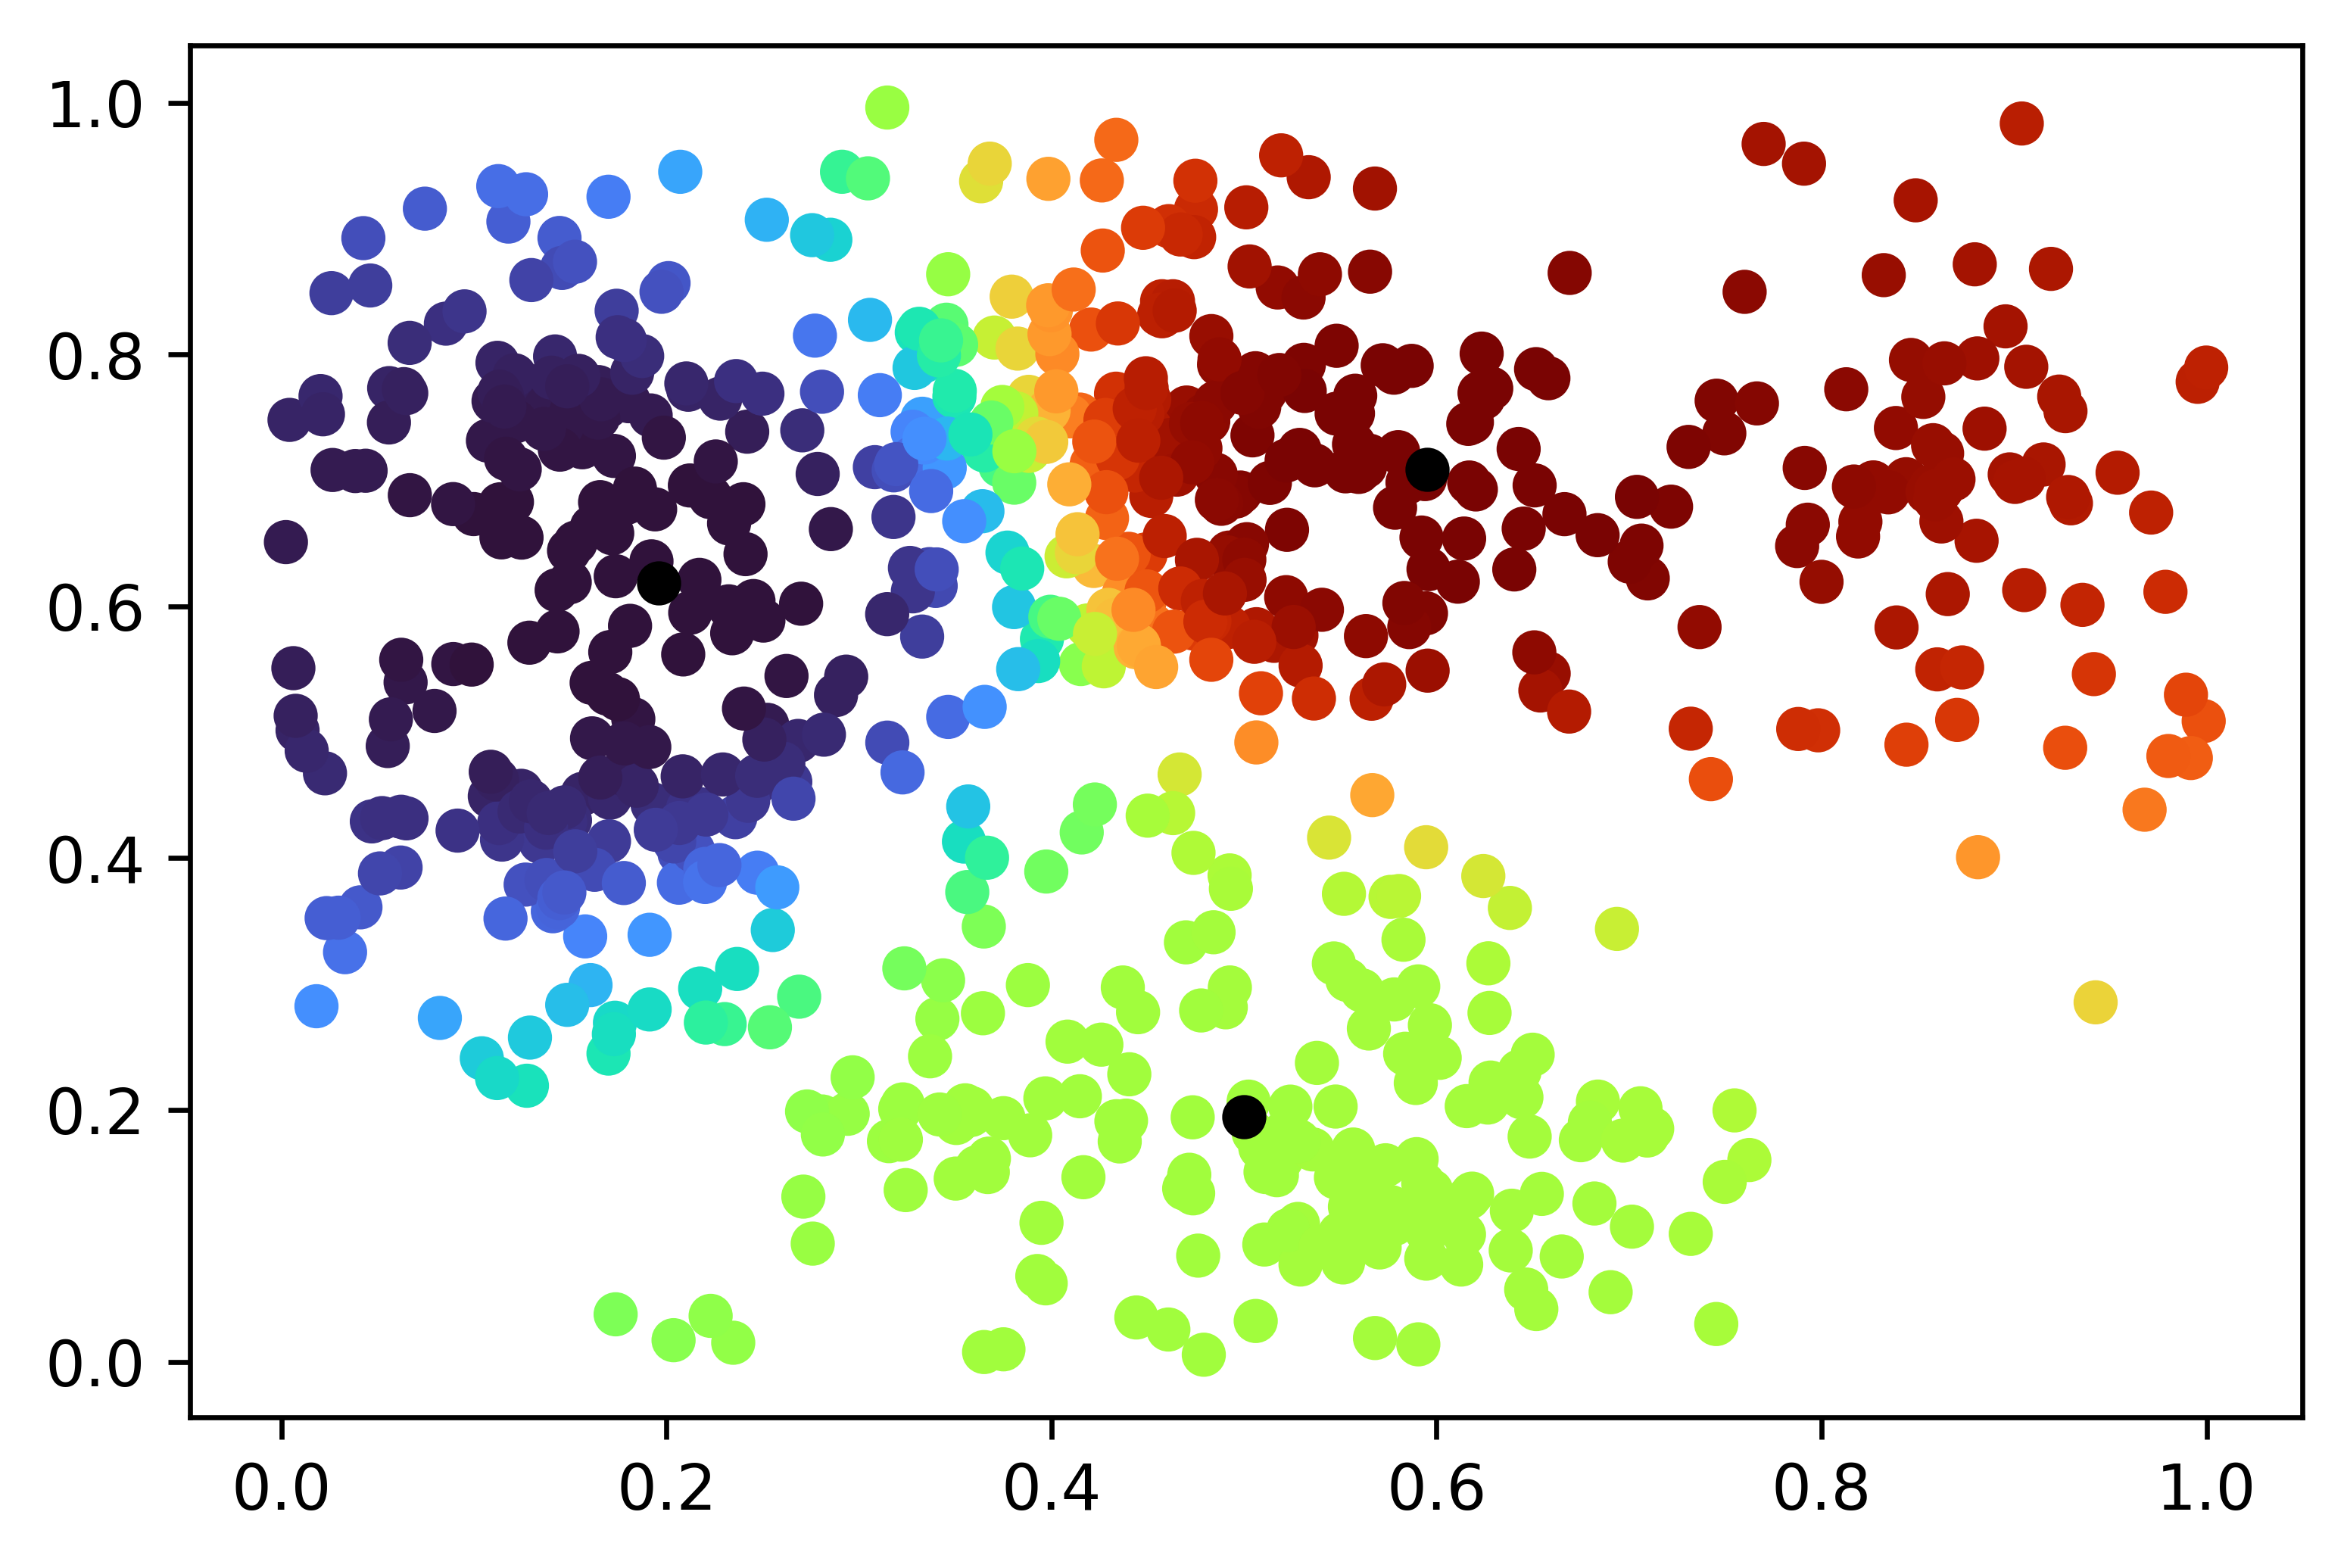

In [24]:
# Plotting cluster plot for data 4
clusterer = Clusterer(3, 1.50)
clusterer.cluster(data3)
color_value = color_function(clusterer.cluster_dependence, 3)
cluster_centroids = clusterer.centroids

fig, ax = plt.subplots()
ax.scatter(data3[0, :], data3[1, :], c = color_value, cmap = "turbo")
ax.scatter(cluster_centroids[0, :], cluster_centroids[1, :], c = "black")